In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('C:\Projects\DataSets\F1\F1.csv')
print('Initial Analysis:')
print('Shape: ',df.shape)
print('Variables: ', df.dtypes)
df[:3]

Initial Analysis:
Shape:  (24617, 23)
Variables:  season              int64
round               int64
raceName           object
date               object
circuitId          object
circuitName        object
number            float64
position            int64
positionText       object
points            float64
driverId           object
givenName          object
familyName         object
dateOfBirth        object
nationality        object
constructorId      object
name               object
nationality.1      object
results.grid        int64
results.laps        int64
results.status     object
Circ Count         object
Full Name          object
dtype: object


,season,round,raceName,date,circuitId,circuitName,number,position,positionText,points,...,dateOfBirth,nationality,constructorId,name,nationality.1,results.grid,results.laps,results.status,Circ Count,Full Name
0,1950,1,British Grand Prix,1950-05-13,silverstone,Silverstone Circuit,2.0,1,1,9.0,...,1906-10-30,Italian,alfa,Alfa Romeo,Italian,1,70,Finished,Silverstone Circuit,Nino Farina
1,1950,1,British Grand Prix,1950-05-13,silverstone,Silverstone Circuit,3.0,2,2,6.0,...,1898-06-09,Italian,alfa,Alfa Romeo,Italian,2,70,Finished,NaN,Luigi Fagioli
2,1950,1,British Grand Prix,1950-05-13,silverstone,Silverstone Circuit,4.0,3,3,4.0,...,1911-07-02,British,alfa,Alfa Romeo,Italian,4,70,Finished,NaN,Reg Parnell


Keeping relevant variables for the analysis:

In [3]:
df = df[['season','round','date','position','name','Full Name']]

## Counting winnings

1. Creating new 'winnings' DF by copying only 1th position rows
2. Creating new Counting columns Using cumcount function on Teams and Drivers columns
3. Concatenating the new Counting columns back with the original DF, based on index

In [4]:
df_first = df[df['position']==1]
df_first['TeamWinningCounter'] = df_first.groupby('name').cumcount()+1
df_first['DriverWinningCounter'] = df_first.groupby('Full Name').cumcount()+1
df = pd.concat([df, df_first[['TeamWinningCounter','DriverWinningCounter']]], axis=1)

C:\Users\97252\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\97252\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Counting Entries

Solving multiple drivers duplicacy
1. Creating unique variable for each team in each race
2. Finding duplicates -> teams with multiple drivers
3. Replacing the duplicates with NAs
4. Apply cumcount on the unique variable,
Drivers are individuals so they are good to go

In [5]:
df['TeamRaceId'] = df['date'] + df['name'] # create unique variable for each team per race
df['TeamRaceIdDup'] = df['TeamRaceId'].duplicated() # find duplicates -> multiple drivers for the same team
df['TeamPart'] = np.where(df['TeamRaceIdDup'] == False, df['name'], np.nan) # replacing duplicates with NAs
df['TeamPartCounter'] = df.groupby('TeamPart').cumcount() + 1 # counting every Team's participation 
df.loc[df['TeamPart'].isna(), 'TeamPartCounter'] = 0 # replacing NAs counter with 0s
df['DriverPartCounter'] = df.groupby('Full Name').cumcount() + 1
df = df[['season','round','date','position','name','Full Name','TeamWinningCounter','DriverWinningCounter','TeamPartCounter','DriverPartCounter']]

In [6]:
df[df['name']=='Alfa Romeo'][:10] # we can see that the counters are working well

,season,round,date,position,name,Full Name,TeamWinningCounter,DriverWinningCounter,TeamPartCounter,DriverPartCounter
0,1950,1,1950-05-13,1,Alfa Romeo,Nino Farina,1.0,1.0,1,1
1,1950,1,1950-05-13,2,Alfa Romeo,Luigi Fagioli,NaN,NaN,0,1
2,1950,1,1950-05-13,3,Alfa Romeo,Reg Parnell,NaN,NaN,0,1
12,1950,1,1950-05-13,12,Alfa Romeo,Juan Fangio,NaN,NaN,0,1
23,1950,2,1950-05-21,1,Alfa Romeo,Juan Fangio,2.0,1.0,2,2
33,1950,2,1950-05-21,11,Alfa Romeo,Nino Farina,NaN,NaN,0,2
34,1950,2,1950-05-21,12,Alfa Romeo,Luigi Fagioli,NaN,NaN,0,2
79,1950,4,1950-06-04,1,Alfa Romeo,Nino Farina,3.0,2.0,3,3
80,1950,4,1950-06-04,2,Alfa Romeo,Luigi Fagioli,NaN,NaN,0,3
90,1950,4,1950-06-04,12,Alfa Romeo,Juan Fangio,NaN,NaN,0,3


# Teams & Drivers Comparisons

## Experience

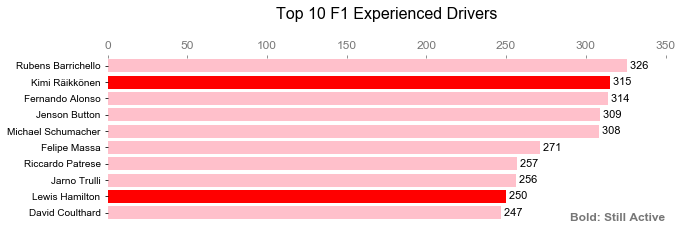

In [7]:
import seaborn as sns

top_10 = df[['Full Name','round']].groupby('Full Name').count().sort_values('round', ascending=True).tail(10)

fig, ax = plt.subplots(figsize=(10, 3))

#sns.set_context("notebook", font_scale=1.2,rc={"lines.linewidth":2.5})
active = ['pink','red','pink','pink','pink','pink','pink','pink','red','pink']
ax.barh(top_10.index, top_10['round'], color=active)

for i, (value, name) in enumerate(zip(top_10['round'], top_10.index)):
    ax.text(value, i,     f' {value:,.0f}',  size=11, ha='left',  va='center')
ax.text(1, 0, 'Bold: Still Active', transform=ax.transAxes, color='#777777', size=12, ha='right', weight=800)
ax.xaxis.set_ticks_position('top')
ax.set_xlim(0,350)
ax.tick_params(axis='x', colors='#777777', labelsize=12)
ax.margins(0, 0.01)
plt.title('Top 10 F1 Experienced Drivers', y=1.2, fontsize = 16)
sns.set_style('white')
plt.box(False)


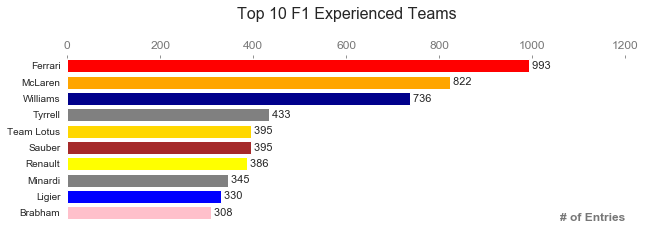

In [8]:
top_10 = df[['name','TeamPartCounter']].groupby('name').max().sort_values('TeamPartCounter', ascending=True).tail(10)

fig, ax = plt.subplots(figsize=(10, 3))

teams = ['red','orange','darkblue','grey','gold','brown','yellow','grey','blue','pink']
ax.barh(top_10.index, top_10['TeamPartCounter'], color=teams[::-1])

for i, (value, name) in enumerate(zip(top_10['TeamPartCounter'], top_10.index)):
    ax.text(value, i,     f' {value:,.0f}',  size=11, ha='left',  va='center')
ax.text(1, 0, '# of Entries', transform=ax.transAxes, color='#777777', size=12, ha='right', weight=800)
ax.xaxis.set_ticks_position('top')
ax.set_xlim(0,1200)
ax.tick_params(axis='x', colors='#777777', labelsize=12)
ax.margins(0, 0.01)
plt.title('Top 10 F1 Experienced Teams', y=1.2, fontsize = 16)
sns.set_style('white')
plt.box(False)


## Winnings

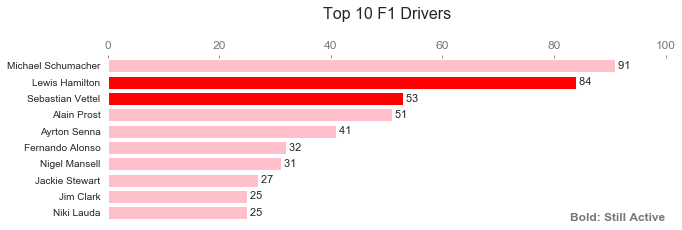

In [9]:
top_10 = df[['Full Name','DriverWinningCounter']].groupby('Full Name').max().sort_values('DriverWinningCounter',ascending=False)[:10]
top_10 = top_10[::-1]

fig, ax = plt.subplots(figsize=(10, 3))
active = ['pink','red','red','pink','pink','pink','pink','pink','pink','pink']
ax.barh(top_10.index, top_10['DriverWinningCounter'], color=active[::-1])

for i, (value, name) in enumerate(zip(top_10['DriverWinningCounter'], top_10.index)):
    ax.text(value, i,     f' {value:,.0f}',  size=11, ha='left',  va='center')
ax.text(1, 0, 'Bold: Still Active', transform=ax.transAxes, color='#777777', size=12, ha='right', weight=800)
ax.xaxis.set_ticks_position('top')
ax.set_xlim(0,100)
ax.tick_params(axis='x', colors='#777777', labelsize=12)
ax.margins(0, 0.01)
plt.title('Top 10 F1 Drivers', y=1.2, fontsize = 16)
sns.set_style('white')
plt.box(False)

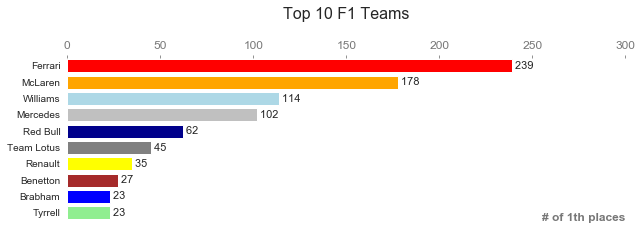

In [10]:
top_10 = df[['name','TeamWinningCounter']].groupby('name').max().sort_values('TeamWinningCounter',ascending=False)[:10]
top_10 = top_10[::-1]

teams = ['red','orange','lightblue','silver','darkblue','grey','yellow','brown','blue','lightgreen']

fig, ax = plt.subplots(figsize=(10, 3))

ax.barh(top_10.index, top_10['TeamWinningCounter'], color=teams[::-1])

for i, (value, name) in enumerate(zip(top_10['TeamWinningCounter'], top_10.index)):
    ax.text(value, i,     f' {value:,.0f}',  size=11, ha='left',  va='center')
ax.text(1, 0, '# of 1th places', transform=ax.transAxes, color='#777777', size=12, ha='right', weight=800)
ax.xaxis.set_ticks_position('top')
ax.set_xlim(0,300)
ax.tick_params(axis='x', colors='#777777', labelsize=12)
ax.margins(0, 0.01)
plt.title('Top 10 F1 Teams', y=1.2, fontsize = 16)
sns.set_style('white')
plt.box(False)

## Calculating Ratios

We can see that there is a relation between experience and success. if a team has more years of experience, then it can collect more 1th places. in order to cancle this effect and make a 'fair' comparison, we will calculate winning ratios by dividing Winnings / Entries.
1. Creating new DF for drivers
2. Calculatin winning ratio
3. Filtering Drivers with less than 100 Entries

In [11]:
df_drivers_ratio = df.groupby('Full Name')[['DriverPartCounter','DriverWinningCounter']].max().sort_values('DriverPartCounter', ascending=False)
df_drivers_ratio['WinningRatio'] = df_drivers_ratio['DriverWinningCounter'] / df_drivers_ratio['DriverPartCounter']
top_10 = df_drivers_ratio[df_drivers_ratio['DriverPartCounter'] > 100].sort_values('WinningRatio', ascending=False)[:10]
top_10 = top_10[::-1]

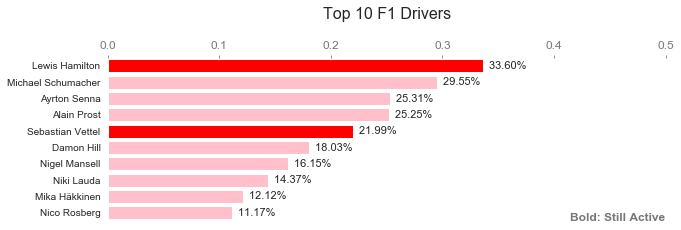

In [12]:


fig, ax = plt.subplots(figsize=(10, 3))
active = ['red','pink','pink','pink','red','pink','pink','pink','pink','pink']
ax.barh(top_10.index, top_10['WinningRatio'], color=active[::-1])

for i, (value, name) in enumerate(zip(top_10['WinningRatio'], top_10.index)):
    ax.text(value, i,     f' {value: .2%}',  size=11, ha='left',  va='center')
ax.text(1, 0, 'Bold: Still Active', transform=ax.transAxes, color='#777777', size=12, ha='right', weight=800)
ax.xaxis.set_ticks_position('top')
ax.set_xlim(0,0.5)
ax.tick_params(axis='x', colors='#777777', labelsize=12)
ax.margins(0, 0.01)
plt.title('Top 10 F1 Drivers', y=1.2, fontsize = 16)
sns.set_style('white')
plt.box(False)

In [13]:
df_teams_ratio = df.groupby('name')[['TeamPartCounter','TeamWinningCounter']].max().sort_values('TeamPartCounter', ascending=False)
df_teams_ratio['WinningRatio'] = df_teams_ratio['TeamWinningCounter'] / df_teams_ratio['TeamPartCounter']
top_10 = df_teams_ratio[df_teams_ratio['TeamPartCounter'] > 100].sort_values('WinningRatio', ascending=False)[:10]
top_10 = top_10[::-1]

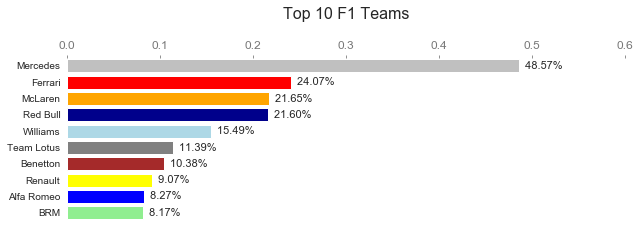

In [14]:

fig, ax = plt.subplots(figsize=(10, 3))
active = ['silver','red','orange','darkblue','lightblue','grey','brown','yellow','blue','lightgreen']
ax.barh(top_10.index, top_10['WinningRatio'], color=active[::-1])

for i, (value, name) in enumerate(zip(top_10['WinningRatio'], top_10.index)):
    ax.text(value, i,     f' {value: .2%}',  size=11, ha='left',  va='center')
#ax.text(1, 0, 'Bold: Still Active', transform=ax.transAxes, color='#777777', size=12, ha='right', weight=800)
ax.xaxis.set_ticks_position('top')
ax.set_xlim(0,0.6)
ax.tick_params(axis='x', colors='#777777', labelsize=12)
ax.margins(0, 0.01)
plt.title('Top 10 F1 Teams', y=1.2, fontsize = 16)
sns.set_style('white')
plt.box(False)

# Visual Streaks

In order to calculate streaks, we need first to make 2 adjustments:
1. Create 'winning' column
2. Make a continuous 'index' variable by adding season (year) and round.

In [15]:
df_race = df[['date','position','name','season','round']]
df_race['Winning'] = np.where(df['position']==1,1,0)
#df_race = df_race.drop('position',axis=1)
df_race.sort_values(['season','date','round'],inplace=True)
df_race['idx'] = round(df_race['season'] + (df_race['round'] / 100),2)
#df_race.reset_index(inplace=True)
df_race = df_race.drop(['position','round','season'],axis=1)



C:\Users\97252\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\97252\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\97252\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

Streaks' plotting Function:
1. Changing winning column variable into 'win' (1) or 'loss' (0)
2. Finding start of each streak by shifting and comparing
3. using cumcount & cumsum for aggregate the streaks
4. Changing losing streaks to negative values
5. plotting


In [34]:
def streak_plotting(team):
    
    
    df_f = df_race[df_race['name']==team]
    df_f = df_f.groupby('idx').sum()
    df_f['Winning'].replace({True:'win',False:'loss'}, inplace=True)
    races = df_f['Winning'].to_frame()
    
    data = races['Winning'].to_frame()
    data['start_of_streak'] = data['Winning'].ne(data['Winning'].shift())
    data['streak_id'] = data.start_of_streak.cumsum()
    data['streak_counter'] = data.groupby('streak_id').cumcount() + 1
    races_with_streaks = pd.concat([races, data['streak_counter']], axis=1)
    
    races_with_streaks.loc[races_with_streaks['Winning'] == "win", "wins"] = races_with_streaks['streak_counter']
    races_with_streaks.loc[races_with_streaks['Winning'] == "loss", "losses"] = -1 * races_with_streaks['streak_counter']
    
    # plot the streaks
    fig, ax = plt.subplots(figsize=(30,10))
    races_with_streaks['wins'].plot.bar(ax=ax, color='green', width=1)
    races_with_streaks['losses'].plot.bar(ax=ax, color='red', width=1)
    ax.set_title(team + ' winning & losing streaks', fontsize=15)
    ax.set_xticks([])
    ax.set_xlabel('Races')
    #fig, ax = plt.subplots(figsize=(30,10))
    #races_with_streaks['streak_counter'].plot.bar(ax=ax, color='black', width=1)
    
    plt.show()
    



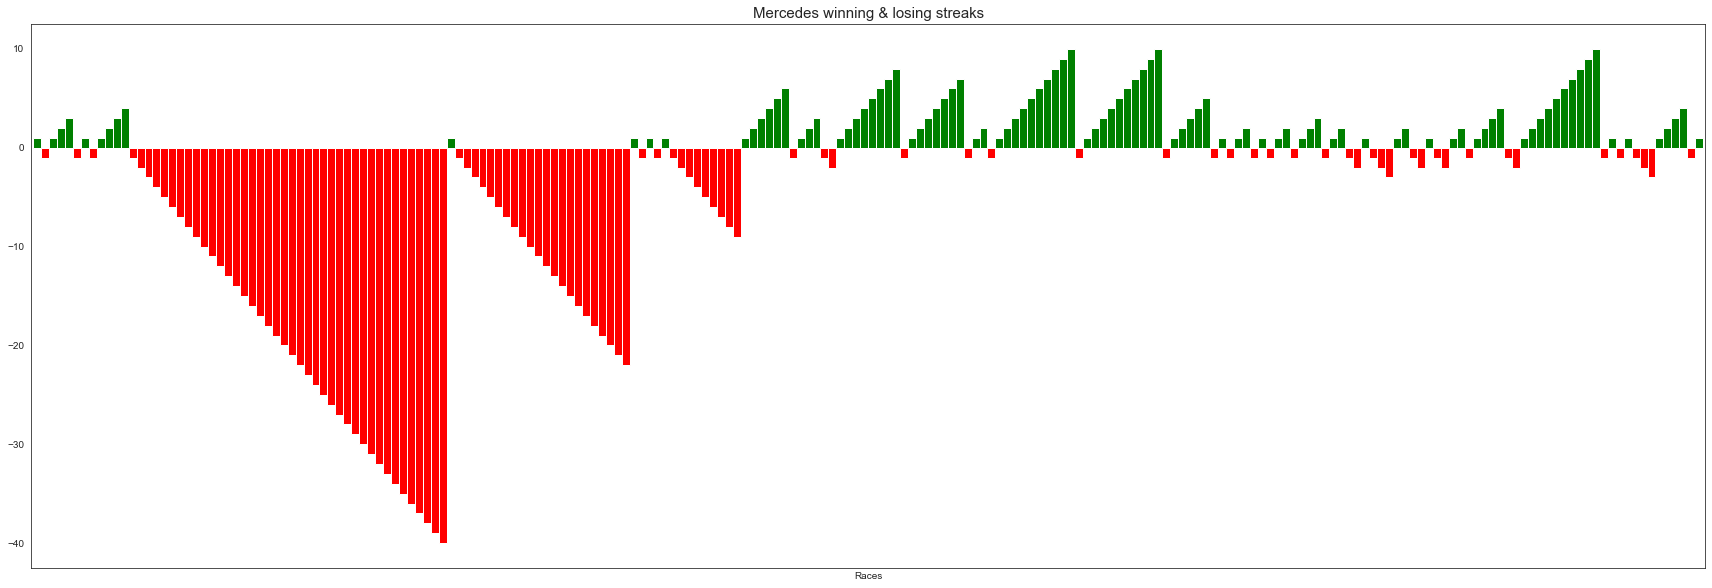

In [35]:
streak_plotting('Mercedes')

# Race Chart

In [200]:
df = pd.read_csv('C:\Projects\DataSets\F1\F1.csv')

In [201]:
df_race = df[['date','position','name','season','round']]

In [202]:

df_race['Winning'] = np.where(df['position']==1,1,0)
#df_race = df_race.groupby(['season','date', 'name']).sum().groupby('name').cumsum()
df_race = df_race.drop('position',axis=1)
#df_race.reset_index(inplace=True)

C:\Users\97252\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [203]:
#df_race[df_race['name']=='Ferrari'][:10]

df_race.sort_values(['season','date','round'],inplace=True)
df_race['idx'] = round(df_race['season'] + (df_race['round'] / 100),2)
df_race = df_race.groupby(['idx', 'name']).sum().groupby('name').cumsum()
df_race.reset_index(inplace=True)
df_race = df_race.drop(['round','season'],axis=1)
df_race

,idx,name,Winning
0,1950.01,Alfa Romeo,1
1,1950.01,Alta,0
2,1950.01,ERA,0
3,1950.01,Maserati,0
4,1950.01,Talbot-Lago,0
...,...,...,...
11952,2019.21,Racing Point,0
11953,2019.21,Red Bull,62
11954,2019.21,Renault,35
11955,2019.21,Toro Rosso,1


In [204]:
race = 2019.01
dff = df_race[df_race['idx'].eq(race)].sort_values(by='Winning', ascending=True).head(10)
dff

,idx,name,Winning
11749,2019.01,Haas F1 Team,0
11752,2019.01,Racing Point,0
11755,2019.01,Toro Rosso,1
11747,2019.01,Alfa Romeo,11
11754,2019.01,Renault,35
11753,2019.01,Red Bull,59
11751,2019.01,Mercedes,88
11756,2019.01,Williams,114
11750,2019.01,McLaren,178
11748,2019.01,Ferrari,236


<BarContainer object of 10 artists>

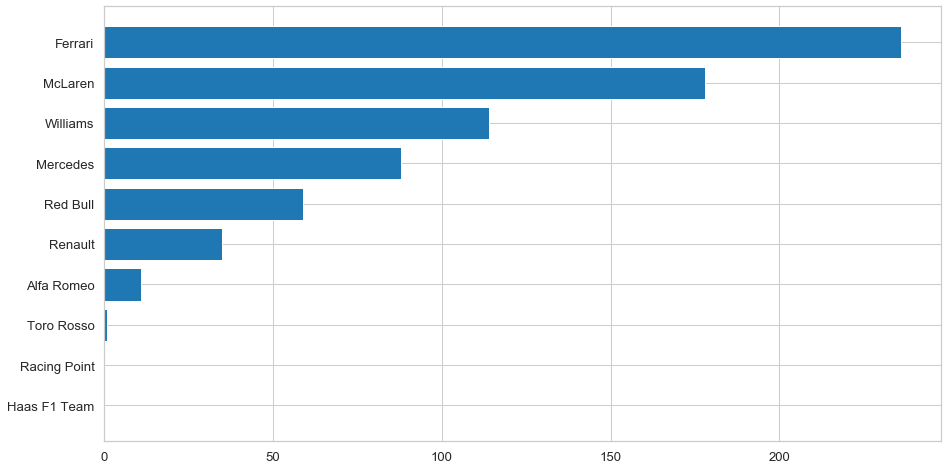

In [205]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['Winning'])

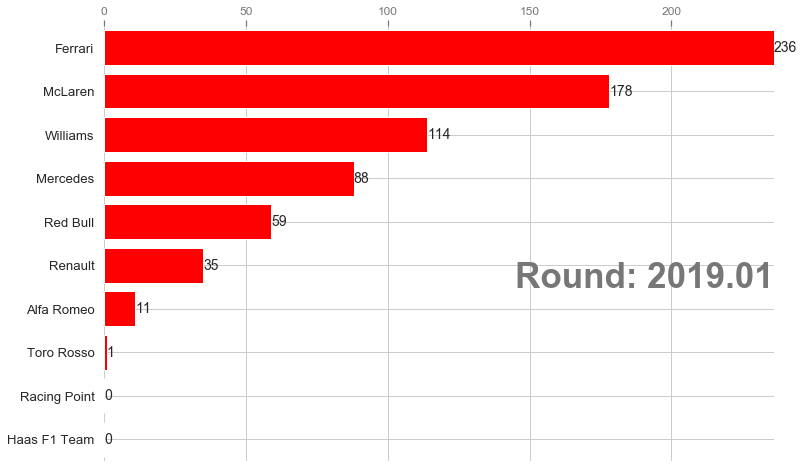

In [206]:
fig, ax = plt.subplots(figsize=(12, 8))
def draw_barchart(race):
    dff = df_race[df_race['idx'].eq(race)].sort_values(by='Winning', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['Winning'], color='red')
    for i, (value, name) in enumerate(zip(dff['Winning'], dff['name'])):
        ax.text(value, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, 'Round: ' + str(race), transform=ax.transAxes, color='#777777', size=35, ha='right', weight=800)
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.margins(0, 0.01)
    plt.box(False)
    
draw_barchart(2019.01)

In [218]:
df_race = df_race[df_race['idx'] > 2018]

KeyboardInterrupt: 

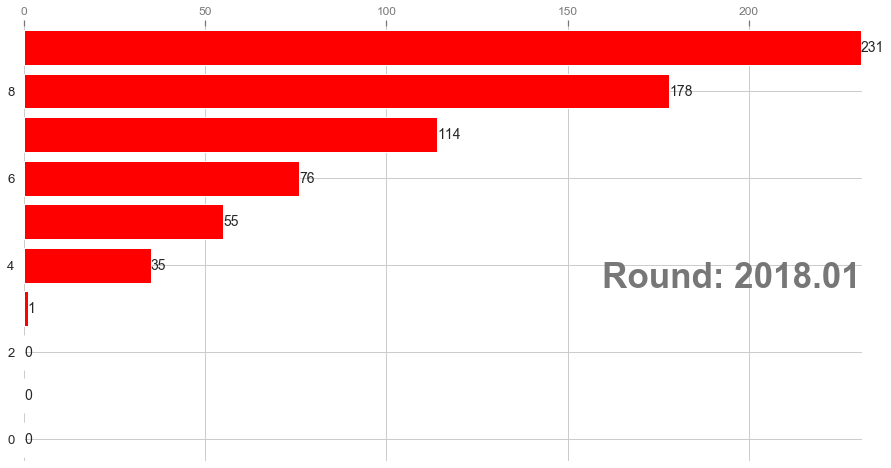

In [219]:
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML
matplotlib.rcParams['animation.embed_limit'] = 2**128
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=list(df_race['idx']))
HTML(animator.to_jshtml())
animator.save('racechart2.gif')
# or use animator.to_html5_video() or animator.save()